In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import transformers
from transformers import pipeline

In [127]:
df = pd.read_csv("Opal/Data/preprocessed_osteoporosis_prob.csv")

In [128]:
bin_age = []


for age in df['Age']:
    if age == '7-12':
        bin_age.append('0-44')
    elif age == '13-18':
        bin_age.append('0-44')
    elif age == '19-24':
        bin_age.append('0-44')
    elif age == '25-34':
        bin_age.append('0-44')
    elif age == '35-44':
        bin_age.append('0-44')
    elif age == '45-54':
        bin_age.append('45-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65-74')
    elif age == '75 or over':
        bin_age.append('75+')
    else:
        #missing values
        bin_age.append('')

df['Age'] = bin_age

In [129]:
Review = []

for satisfaction in df['Satisfaction']:
    if satisfaction < 3:
        Review.append('bad')
    else:
        Review.append('good')

df['Review'] = Review

## n-gram helper functions

In [131]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Enhanced stopwording
more_stopwords = {'went', 'go', 'one', 'two', '2', '3', 'side', 'effects'}
stopwords = stopwords.union(more_stopwords)

In [132]:
from collections import defaultdict
import nltk
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
"""import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
#nltk.word_tokenize(df_ost['Reviews'].iloc[0])

tokenizer = nltk.RegexpTokenizer(r"\w+")
#new_words = tokenizer.tokenize(df_ost['Reviews'].iloc[0])"""

'import nltk\nfrom collections import defaultdict\nfrom nltk.tokenize import word_tokenize\n#nltk.word_tokenize(df_ost[\'Reviews\'].iloc[0])\n\ntokenizer = nltk.RegexpTokenizer(r"\\w+")\n#new_words = tokenizer.tokenize(df_ost[\'Reviews\'].iloc[0])'

In [133]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string

In [134]:
def generate_ngrams(text, n_gram=1):
    from nltk.tokenize import word_tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    #text = tokenizer.tokenize(text)

    token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords]
    token = [remove_punc(i) for i in token]
    #token = [token for token in tokenizer.tokenize(text) if token != "" if token not in STOPWORDS]
    
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [135]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Effectiveness

In [138]:
#have as probabilities instead of 0 or 1
df_effectiveness = df[df["effectiveness"]>0.7]

In [155]:
freq_dict = defaultdict(int)
for sent in df_effectiveness[df_effectiveness["Review"] == 'bad']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

freq_dict = defaultdict(int)
for sent in df_effectiveness[df_effectiveness["Review"] == 'good']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Side Effects

In [140]:
#have as probabilities instead of 0 or 1
df_side_effects = df[df["side_effect"]>0.7]

In [157]:
freq_dict = defaultdict(int)
for sent in df_side_effects[df_side_effects["Review"] == 'bad']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

freq_dict = defaultdict(int)
for sent in df_side_effects[df_side_effects["Review"] == 'good']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Classification

In [142]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

### Sample Experimentation

In [ ]:
#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)

sample_review = "This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow."


res = classifier(
    sample_review,
    candidate_labels = ['limb pain', 'gastrointestinal', 'dental', 'cardiac', 'dermatological', 'respiratory' , 'weight gain and loss', 'headache'], 
    multi_class = True
)
res

In [143]:
sides = ['limb pain', 'gastrointestinal', 'dental', 'cardiac', 'dermatological', 'respiratory' , 'weight gain and loss', 'headache']

In [159]:
#setting empty values for the columns
index = -1
for label in sides:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

In [316]:
print(len(df))
print(len(df_side_effects))
print(round(len(df_side_effects)/len(df),2))

1357
1312
0.97


In [ ]:
#df.to_csv('data/updated_df.csv')

In [163]:
df['max'] = df[['limb pain_m', 'gastrointestinal_m', 'dental_m', 'cardiac_m', 'dermatological_m', 'respiratory_m', 'weight gain and loss_m', 'headache_m']].max(axis=1)
df.head()

,Unnamed: 0,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Review,limb pain_m,gastrointestinal_m,dental_m,cardiac_m,dermatological_m,respiratory_m,weight gain and loss_m,headache_m,max
0,0,0-44,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,...,bad,0.138630,0.057640,0.012045,0.090442,0.185604,0.196592,0.087278,0.151928,0.196592
1,1,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,...,good,0.044549,0.313618,0.009981,0.067002,0.222304,0.143084,0.031699,0.041735,0.313618
2,2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,...,good,0.052456,0.139045,0.058516,0.061539,0.294107,0.320504,0.059767,0.015010,0.320504
3,3,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,...,good,0.002769,0.983138,0.369095,0.021584,0.012158,0.062320,0.263505,0.105072,0.983138
4,4,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,...,bad,0.999138,0.000104,0.000074,0.000637,0.001936,0.002675,0.002148,0.038169,0.999138


# Side Effects

In [164]:
df_side_effects = df[df["side_effect"]>0.7].reset_index()

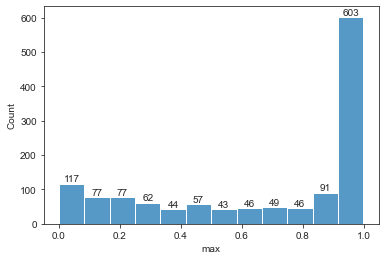

In [186]:
sns.set_style('ticks')
fig, ax = plt.subplots()
ax = sns.histplot(x = 'max', data = df_side_effects)
for container in ax.containers:
    ax.bar_label(container)

In [318]:
print(len(df_side_effects[df_side_effects['max'] > 0.7]))
print(len(df_side_effects))
print(round(len(df_side_effects[df_side_effects['max'] > 0.7])/len(df_side_effects),2))

767
1312
0.58


In [188]:
side1 = []
side2 = []
side3 = []
side4 = []
side5 = []
side6 = []
side7 = []
side8 = []
side9 = []

thresh = 0.7

for i in range(len(df_side_effects)):
    if df_side_effects['limb pain_m'][i] >= thresh:
        side1.append(1)
    elif df_side_effects['limb pain_m'][i] < thresh:
        side1.append(0)
    
    if df_side_effects['gastrointestinal_m'][i] >= thresh:
        side2.append(1)
    elif df_side_effects['gastrointestinal_m'][i] < thresh:
        side2.append(0)

    if df_side_effects['dental_m'][i] >= thresh:
        side3.append(1)
    elif df_side_effects['dental_m'][i] < thresh:
        side3.append(0)

    if df_side_effects['cardiac_m'][i] >= thresh:
        side4.append(1)
    elif df_side_effects['cardiac_m'][i] < thresh:
        side4.append(0)

    if df_side_effects['dermatological_m'][i] >= thresh:
        side5.append(1)
    elif df_side_effects['dermatological_m'][i] < thresh:
        side5.append(0)

    if df_side_effects['respiratory_m'][i] >= thresh:
        side6.append(1)
    elif df_side_effects['respiratory_m'][i] < thresh:
        side6.append(0)

    if df_side_effects['weight gain and loss_m'][i] >= thresh:
        side7.append(1)
    elif df_side_effects['weight gain and loss_m'][i] < thresh:
        side7.append(0)

    if df_side_effects['headache_m'][i] >= thresh:
        side8.append(1)
    elif df_side_effects['headache_m'][i] < thresh:
        side8.append(0)



df_side_effects['limb pain'] = side1
df_side_effects['gastrointestinal'] = side2
df_side_effects['dental'] = side3
df_side_effects['cardiac'] = side4
df_side_effects['dermatological'] = side5
df_side_effects['respiratory'] = side6
df_side_effects['weight'] = side7
df_side_effects['headache'] = side8


In [190]:
df_side_effects.to_csv('temp.csv', index = False)

In [319]:
df2 = df_side_effects[df_side_effects['max'] < 0.7]

In [192]:
freq_dict = defaultdict(int)
for sent in df2[df2["Review"] == 'bad']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

freq_dict = defaultdict(int)
for sent in df2[df2["Review"] == 'good']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [118]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [ ]:
sides2 = ['flu', 'body ache']


#setting empty values for the columns
index = -1
for label in sides2:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

In [125]:
#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)

sample_review = "I have a serious back pain"


res = classifier(
    sample_review,
    candidate_labels = ['flu', 'body pain'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'I have a serious back pain',
 'labels': ['body pain', 'flu'],
 'scores': [0.9977540969848633, 6.392119394149631e-05]}

In [381]:
side_tf = []


thresh = 0.7

for i in range(len(df_side_effects)):
    if df_side_effects['limb pain'][i] == 1:
        side_tf.append('limb')
    elif df_side_effects['gastrointestinal'][i] == 1:
        side_tf.append('gastro')
    elif df_side_effects['dental'][i] == 1:
        side_tf.append('dental')
    elif df_side_effects['cardiac'][i] == 1:
        side_tf.append('cardiac')
    elif df_side_effects['dermatological'][i] == 1:
        side_tf.append('derma')
    elif df_side_effects['respiratory'][i] == 1:
        side_tf.append('respiratory')
    elif df_side_effects['weight'][i] == 1:
        side_tf.append('weight')
    elif df_side_effects['headache'][i] == 1:
        side_tf.append('headache')
    else:
        side_tf.append('other')

df_side_effects['side_tf'] = side_tf

## EDA (age distribution, ie dental things tend to affect older people)

In [320]:
#df_side_effects.drop(['Unnamed: 0'], axis = 1)

# Side Effects EDA

In [205]:
df_limb = df_side_effects[df_side_effects['limb pain'] == 1]
df_gastro = df_side_effects[df_side_effects['gastrointestinal'] == 1]
df_dental = df_side_effects[df_side_effects['dental'] == 1]
df_cardiac = df_side_effects[df_side_effects['cardiac'] == 1]
df_derma = df_side_effects[df_side_effects['dermatological'] == 1]
df_resp = df_side_effects[df_side_effects['respiratory'] == 1]
df_weight = df_side_effects[df_side_effects['weight'] == 1]
df_headache = df_side_effects[df_side_effects['headache'] == 1]

In [309]:
total = len(df_side_effects)
print('limb side effects: ', round((len(df_limb)/total)*100,2), '%')
print('gastrointesntinal side effects: ', round((len(df_gastro)/total)*100,2), '%')
print('headache side effects: ', round((len(df_headache)/total)*100,2), '%')
print('respiratory side effects: ', round((len(df_resp)/total)*100,2), '%')
print('weight loss/gain side effects: ', round((len(df_weight)/total)*100,2), '%')
print('dental side effects: ', round((len(df_dental)/total)*100,2), '%')
print('dermatological side effects: ', round((len(df_derma)/total)*100,2), '%')
print('cardiac side effects: ', round((len(df_cardiac)/total)*100,2), '%')

limb side effects:  34.68 %
gastrointesntinal side effects:  14.33 %
headache side effects:  11.43 %
respiratory side effects:  5.41 %
weight loss/gain side effects:  3.51 %
dental side effects:  3.35 %
dermatological side effects:  1.75 %
cadiac side effects:  1.22 %


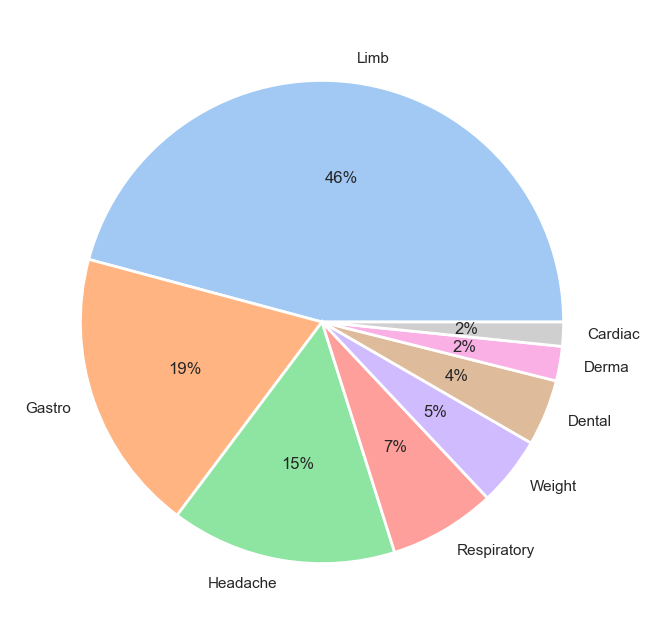

In [313]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200},
        font_scale=0.5,
        style="white"
        )

#define data
data = [round((len(df_limb)/total)*100,2), round((len(df_gastro)/total)*100,2), round((len(df_headache)/total)*100,2), round((len(df_resp)/total)*100,2), round((len(df_weight)/total)*100,2), round((len(df_dental)/total)*100,2), round((len(df_derma)/total)*100,2), round((len(df_cardiac)/total)*100,2)]
labels = ['Limb', 'Gastro', 'Headache', 'Respiratory', 'Weight', 'Dental', 'Derma', 'Cardiac' ]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:8]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Age'>

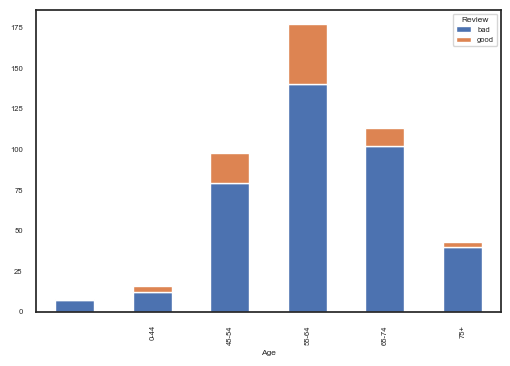

In [378]:
df_plot = df_limb.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

'ax = plt.gca()\nax.set_ylim([0, 200])'

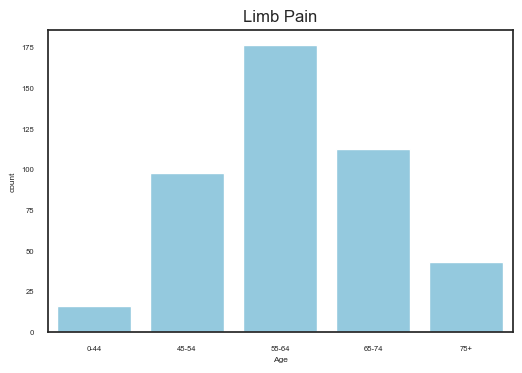

In [334]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100},
        font_scale=0.5,
        style="white"
        )
sns.countplot(x = 'Age', data = df_limb, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Limb Pain', fontsize=12)

"""ax = plt.gca()
ax.set_ylim([0, 200])"""

In [278]:
df_limb.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",159
1,prolia syringe,109
2,actonel tablet osteoporosis agents,36
3,fosamax,26
4,evista,24


<AxesSubplot:xlabel='Age', ylabel='count'>

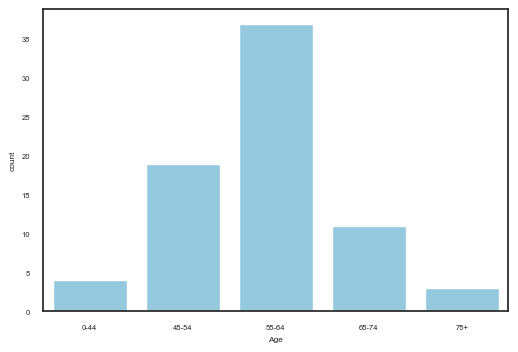

In [338]:
sns.countplot(x = 'Age', data = df_limb[df_limb['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

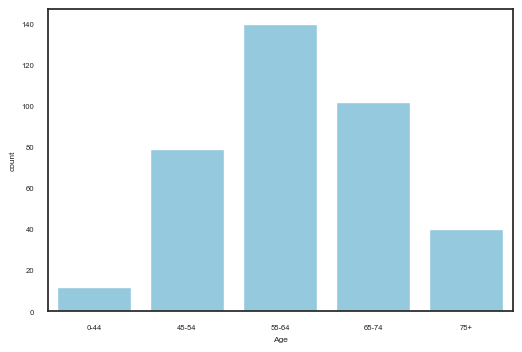

In [339]:
sns.countplot(x = 'Age', data = df_limb[df_limb['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

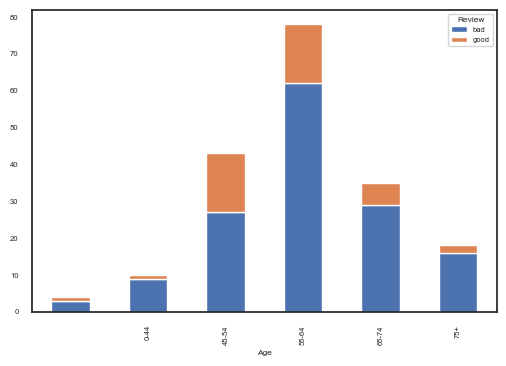

In [377]:
df_plot = df_gastro.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Gastrointesntinal')

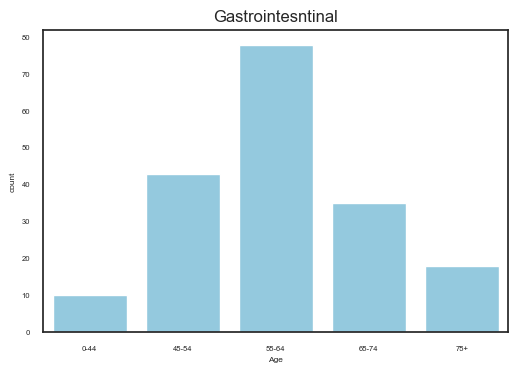

In [333]:
sns.countplot(x = 'Age', data = df_gastro, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Gastrointesntinal', fontsize=12)

In [279]:
df_gastro.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",52
1,actonel tablet osteoporosis agents,27
2,prolia syringe,23
3,atelvia,23
4,boniva,15


<AxesSubplot:xlabel='Age', ylabel='count'>

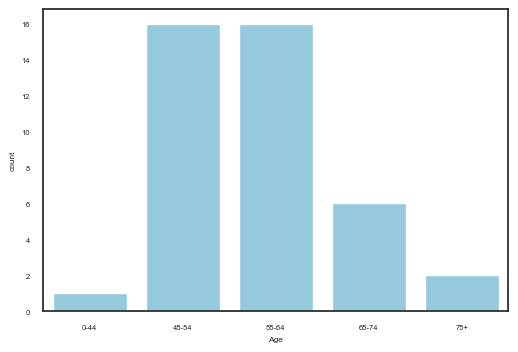

In [341]:
sns.countplot(x = 'Age', data = df_gastro[df_gastro['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

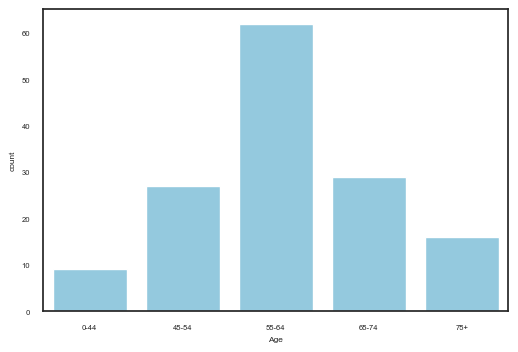

In [342]:
sns.countplot(x = 'Age', data = df_gastro[df_gastro['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

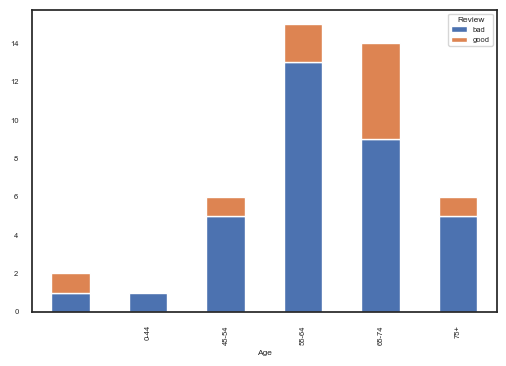

In [376]:
df_plot = df_dental.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Dental')

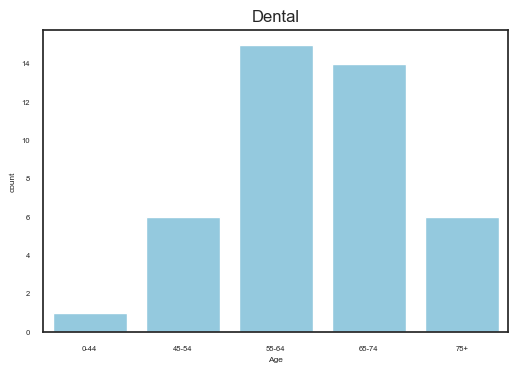

In [337]:
sns.countplot(x = 'Age', data = df_dental, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Dental', fontsize=12)

In [280]:
df_dental.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",13
1,fosamax,9
2,prolia syringe,7
3,actonel tablet osteoporosis agents,6
4,atelvia,2


<AxesSubplot:xlabel='Age', ylabel='count'>

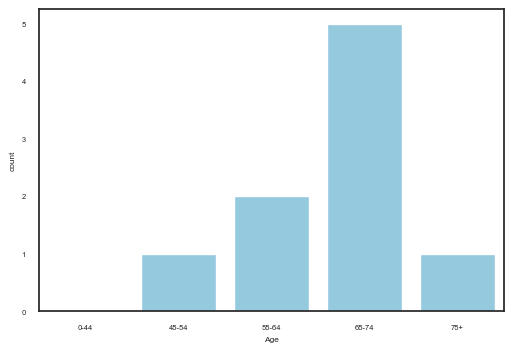

In [343]:
sns.countplot(x = 'Age', data = df_dental[df_dental['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

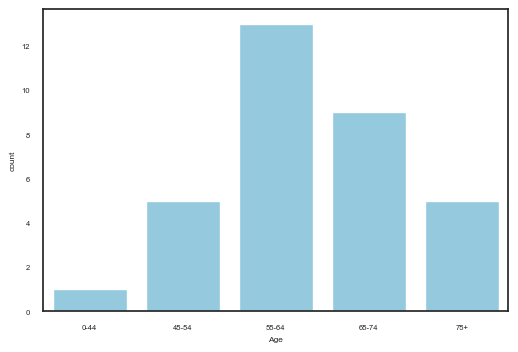

In [344]:
sns.countplot(x = 'Age', data = df_dental[df_dental['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

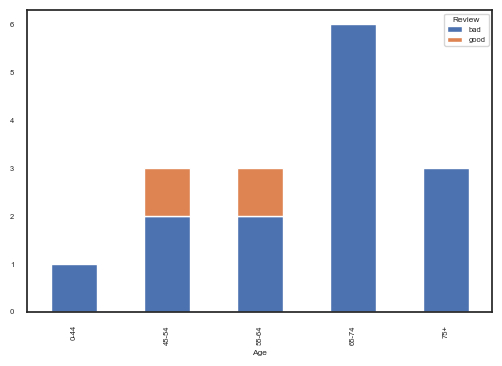

In [375]:
df_plot = df_cardiac.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Cardiac')

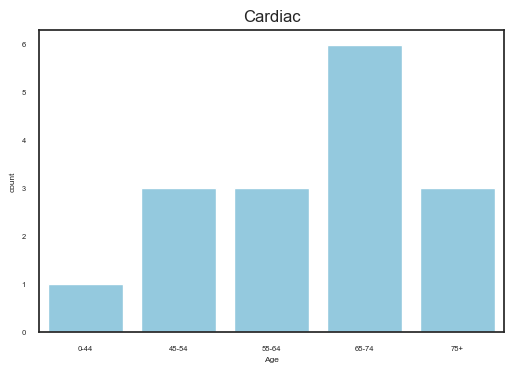

In [258]:
sns.countplot(x = 'Age', data = df_cardiac, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Cardiac', fontsize=12)

In [281]:
df_cardiac.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",6
1,prolia syringe,3
2,forteo pen injector,2
3,actonel 35 mg tablet,1
4,actonel tablet osteoporosis agents,1


<AxesSubplot:xlabel='Age', ylabel='count'>

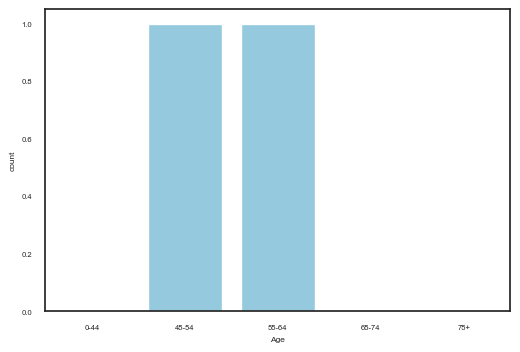

In [346]:
sns.countplot(x = 'Age', data = df_cardiac[df_cardiac['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

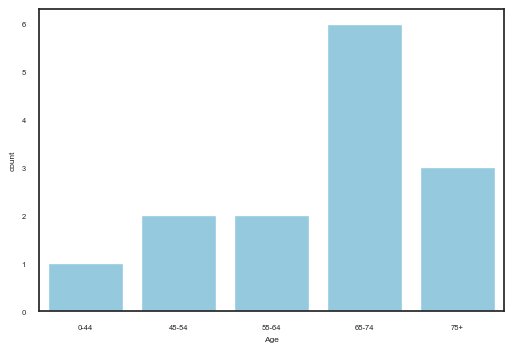

In [347]:
sns.countplot(x = 'Age', data = df_cardiac[df_cardiac['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

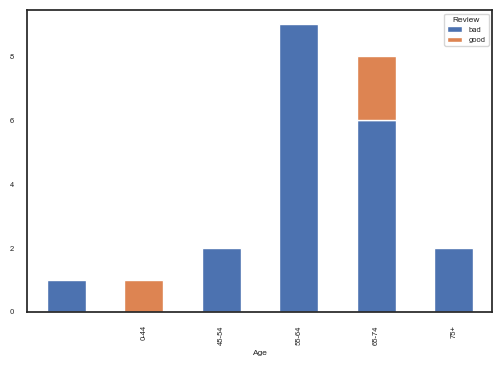

In [374]:
df_plot = df_derma.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Dematological')

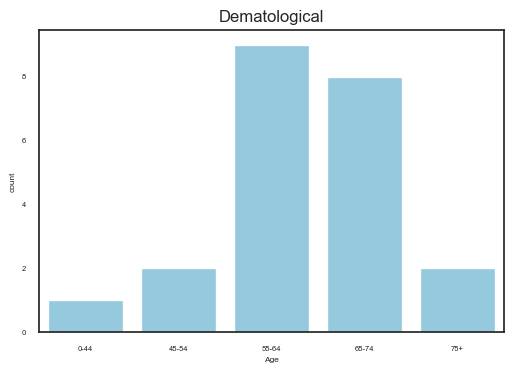

In [259]:
sns.countplot(x = 'Age', data = df_derma, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Dematological', fontsize=12)

In [282]:
df_derma.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,prolia syringe,12
1,"reclast bottle, infusion",3
2,zoledronic acid vial,2
3,boniva,1
4,"climara pro patch, transdermal weekly",1


<AxesSubplot:xlabel='Age', ylabel='count'>

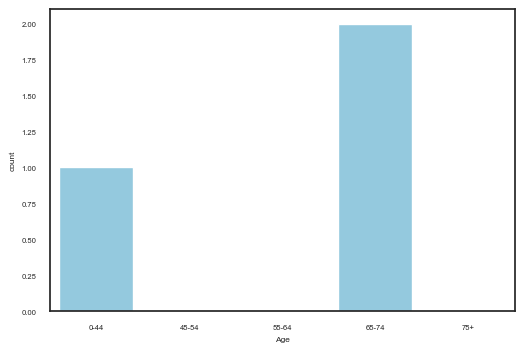

In [349]:
sns.countplot(x = 'Age', data = df_derma[df_derma['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

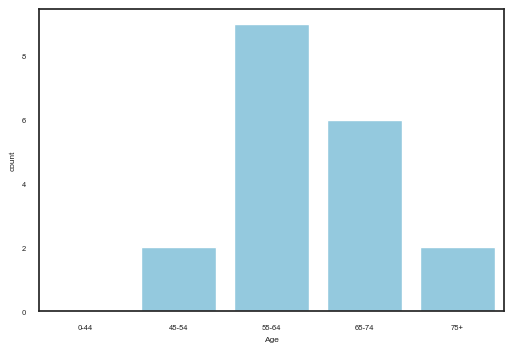

In [348]:
sns.countplot(x = 'Age', data = df_derma[df_derma['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

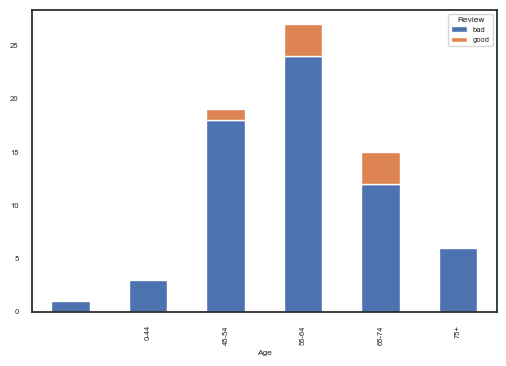

In [373]:
df_plot = df_resp.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Respiratory')

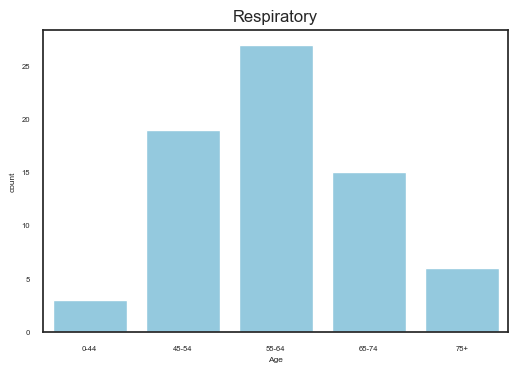

In [260]:
sns.countplot(x = 'Age', data = df_resp, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Respiratory', fontsize=12)

In [283]:
df_resp.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",23
1,prolia syringe,19
2,actonel tablet osteoporosis agents,9
3,atelvia,4
4,boniva,4


<AxesSubplot:xlabel='Age', ylabel='count'>

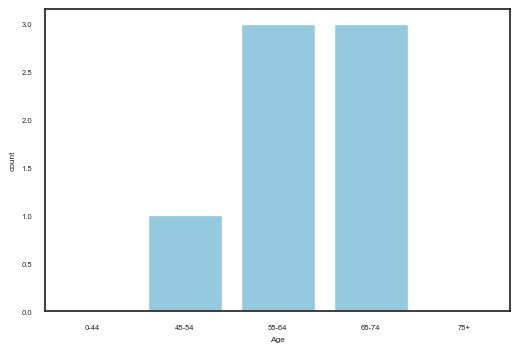

In [350]:
sns.countplot(x = 'Age', data = df_resp[df_resp['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

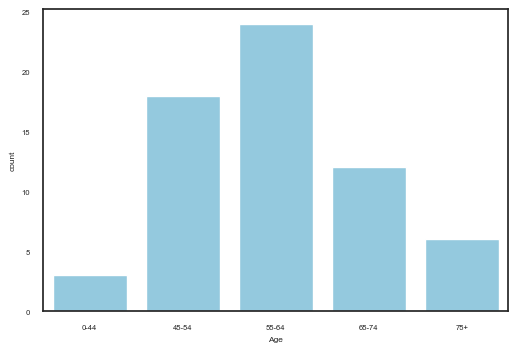

In [351]:
sns.countplot(x = 'Age', data = df_resp[df_resp['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

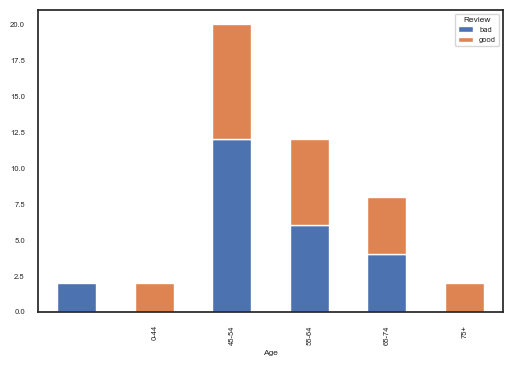

In [372]:
df_plot = df_weight.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Weight Loss / Gain')

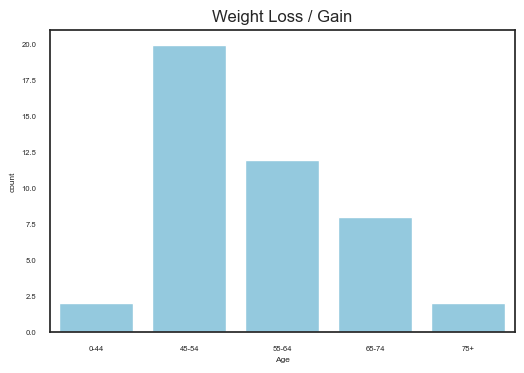

In [261]:
sns.countplot(x = 'Age', data = df_weight, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
plt.title('Weight Loss / Gain', fontsize=12)

In [284]:
df_weight.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",8
1,actonel tablet osteoporosis agents,6
2,prempro,6
3,evista,5
4,estradiol,3


<AxesSubplot:xlabel='Age', ylabel='count'>

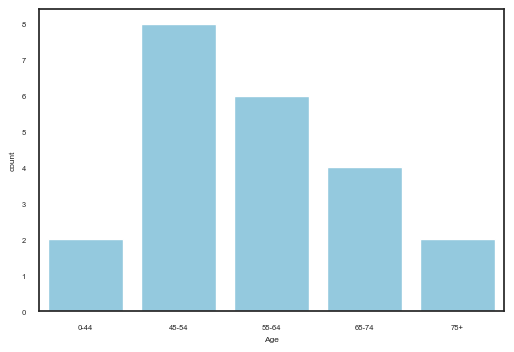

In [352]:
sns.countplot(x = 'Age', data = df_weight[df_weight['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

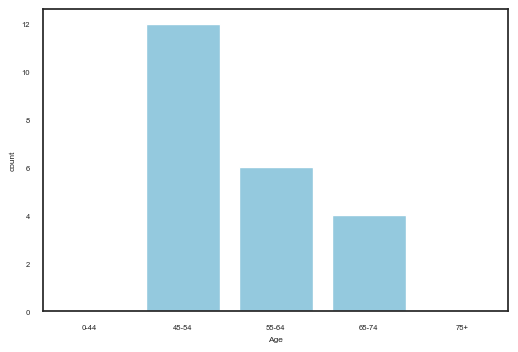

In [353]:
sns.countplot(x = 'Age', data = df_weight[df_weight['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age'>

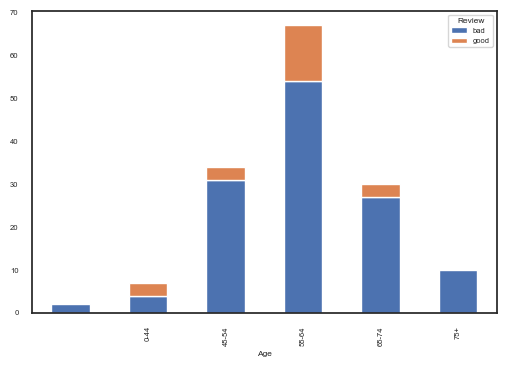

In [369]:
df_plot = df_headache.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
#df_plot
df_plot.plot(kind='bar', stacked=True)

Text(0.5, 1.0, 'Headache')

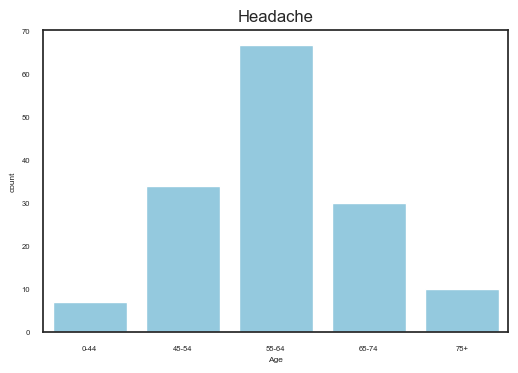

In [371]:
sns.countplot(x = 'Age', data = df_headache, order=["0-44", "45-54", "55-64", "65-74", "75+"], color = 'skyblue')
plt.title('Headache', fontsize=12)

In [285]:
df_headache.groupby('Drug')['Age'].count().sort_values(ascending = False).reset_index().head(5)

,Drug,Age
0,"reclast bottle, infusion",65
1,prolia syringe,26
2,actonel tablet osteoporosis agents,14
3,atelvia,10
4,boniva,4


<AxesSubplot:xlabel='Age', ylabel='count'>

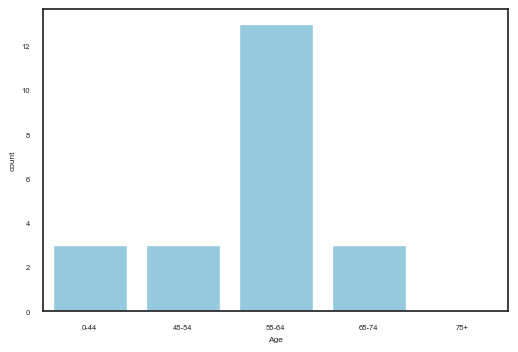

In [354]:
sns.countplot(x = 'Age', data = df_headache[df_headache['Review'] == 'good'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:xlabel='Age', ylabel='count'>

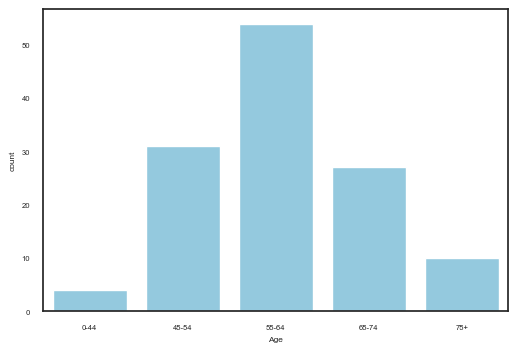

In [355]:
sns.countplot(x = 'Age', data = df_headache[df_headache['Review'] == 'bad'], color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

# TYMLOS

In [230]:
pd.set_option('display.max_colwidth', None)

In [240]:
df_tymlos = df_side_effects.loc[df_side_effects['Drug'].str.contains("tymlos", case=False)]

In [246]:
df_tymlos[['Age', 'limb pain_m', 'gastrointestinal_m', 'dental_m', 'cardiac_m', 'dermatological_m', 'respiratory_m', 'weight gain and loss_m', 'headache_m']]

,Age,limb pain_m,gastrointestinal_m,dental_m,cardiac_m,dermatological_m,respiratory_m,weight gain and loss_m,headache_m
800,55-64,0.000064,0.010645,0.009317,0.144770,0.016742,0.955604,0.024242,0.004002
801,55-64,0.683069,0.000926,0.239098,0.207960,0.002154,0.003112,0.002964,0.016773
802,65-74,0.974608,0.052169,0.001068,0.007542,0.018171,0.002235,0.116981,0.078270


In [247]:
df_tymlos[['Age', 'limb pain', 'gastrointestinal', 'dental', 'cardiac', 'dermatological', 'respiratory', 'weight', 'headache']]

,Age,limb pain,gastrointestinal,dental,cardiac,dermatological,respiratory,weight,headache
800,55-64,0,0,0,0,0,1,0,0
801,55-64,0,0,0,0,0,0,0,0
802,65-74,1,0,0,0,0,0,0,0
